In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import random as random
from matplotlib import pyplot as plt
import math
import time

In [3]:
# importing the dataset
data = pd.read_csv("C:\\Users\\or.hirshman\\Documents\\learning\\DS_Projects\\Mall_Customers_Clustering_Analysis\\Mall_Customers.csv")
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
#Remove id
del data['CustomerID']

In [6]:
# Drop categorical variable
data_no_gender = data[data.columns[1:]]

In [13]:
# Scale  data using StandardScaler 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_no_gender)
scaled_data = pd.DataFrame(x_scaled, columns=data_no_gender.columns)
scaled_data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


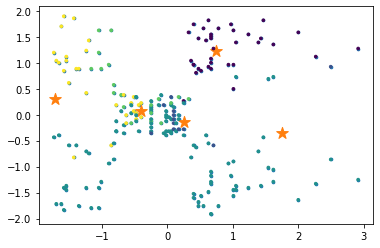

In [122]:
KMeans_implementation(scaled_data , 5)

In [121]:
# Implement KMeans
def KMeans_implementation(data , k):
    init_centroids = initiate_random_centroids(data, k)
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], s=7)
    plt.scatter(init_centroids[:,1], init_centroids[:,2], marker='*', s=150)
    
    #time.sleep(5)
    
    prev_centroids = init_centroids   
    curr_centroids = []
    
    #while(prev_centroids is not curr_centroids):
    data['Cluster'] = calculate_nearest_centroids(data , prev_centroids)
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'],s=7)


In [46]:
def initiate_random_centroids(data, k):
    num_features = data.shape[1]
    random_centroids = np.random.randn(k,num_features)
    return random_centroids

In [85]:
# Calculate nearest centroid for each observation
def calculate_nearest_centroids(data , centroids): 
    centroids_dict = {}
    for index, row in data.iterrows():
        for centroid_index in range(len(centroids)):
            distance = euclidean_distance(row, centroids[centroid_index])
            if index not in centroids_dict:
                centroids_dict[index] = (centroid_index, distance)
            elif centroids_dict[index][1] > distance:
                centroids_dict[index] = (centroid_index, distance)
                            
    curr_centroids = [] 
    for key, value in centroids_dict.items():
        curr_centroids.append(value[0])
    
    return curr_centroids

In [67]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [16]:
# Run SKlearn K means without Gender for 5 clusters- for comparison

kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_data)
identified_clusters = kmeans.predict(scaled_data)

In [20]:
#Appending the identified clusters to the dataframe without gender
clustered_data = data.copy()
clustered_data['Cluster'] = identified_clusters
clustered_data.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,4


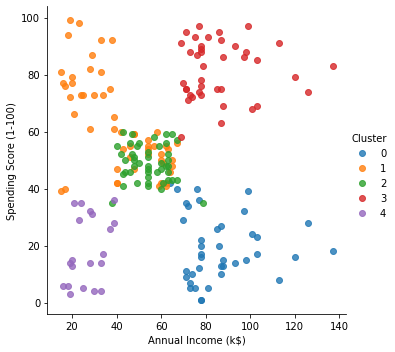

In [22]:
# Plot the 5 clusters Income vs Score
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=clustered_data,hue='Cluster',fit_reg=False)